## Solution Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance




In [2]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
display(contract_df.sample(5))
display(personal_df.sample(5))
display(internet_df.sample(5))
display(phone_df.sample(5))


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3792,6712-OAWRH,2017-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,91.25,2351.8
3021,6377-KSLXC,2019-09-01,No,Month-to-month,No,Mailed check,19.95,107.05
20,8779-QRDMV,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,39.65
6220,6434-TTGJP,2019-04-01,No,Two year,No,Credit card (automatic),53.70,521
6708,2272-QAGFO,2018-08-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,74.30,1096.25


,customerID,gender,SeniorCitizen,Partner,Dependents
5826,9507-EXLTT,Female,0,Yes,No
12,8091-TTVAX,Male,0,Yes,No
2684,5440-VHLUL,Male,0,No,No
2245,6050-FFXES,Female,0,Yes,No
1832,3132-TVFDZ,Male,1,Yes,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1252,9391-EOYLI,Fiber optic,No,No,No,No,No,Yes
2958,8631-NBHFZ,DSL,Yes,Yes,Yes,Yes,Yes,No
3786,0868-VJRDR,Fiber optic,Yes,Yes,No,Yes,Yes,Yes
3084,8720-RQSBJ,DSL,No,No,No,No,No,No
2968,6712-OAWRH,Fiber optic,No,No,No,No,Yes,Yes


,customerID,MultipleLines
4426,1384-RCUXW,Yes
4272,0129-KPTWJ,No
5011,1716-LSAMB,No
4139,4804-NCPET,No
5254,8661-BOYNW,Yes


In [4]:
display(contract_df.info())
display(personal_df.info())
display(internet_df.info())
display(phone_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [5]:
print("--- Contract Data ---")
print(contract_df.duplicated(subset=['customerID']).sum())

print("\n--- Personal Data ---")
print(personal_df.duplicated(subset=['customerID']).sum())

print("\n--- Internet Data ---")
print(internet_df.duplicated(subset=['customerID']).sum())

print("\n--- Phone Data ---")
print(phone_df.duplicated(subset=['customerID']).sum())

--- Contract Data ---
0

--- Personal Data ---
0

--- Internet Data ---
0

--- Phone Data ---
0


There are no obvious duplicates in the data, but it seems that across the datasets, there are discrepencies in user data. Some user data is not included across all of the datasets, which is ok but I'll have to keep this in mind. It will surely need to be addressed so that entries based on costomerID do not have their missing data impact anything. The data types all seem appropriate except for datetime perhaps being needed for date related entries, and perhaps totalcharges needing to be a numeric dataype instead. EndDate needs special treatment, as enddates labled as "No" need to be preserved well. These changes will be done once all of the data has been merged. 

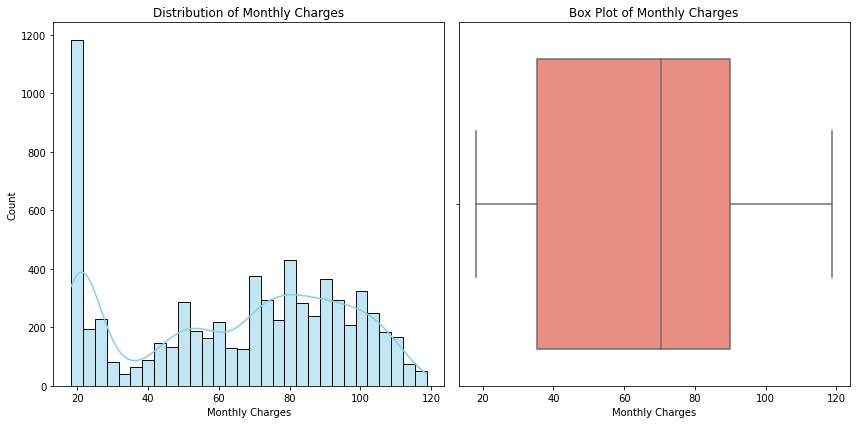

In [6]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.histplot(contract_df['MonthlyCharges'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Monthly Charges')
axes[0].set_title('Distribution of Monthly Charges')


sns.boxplot(x='MonthlyCharges', data=contract_df, color='salmon', ax=axes[1])
axes[1].set_xlabel('Monthly Charges')
axes[1].set_title('Box Plot of Monthly Charges')

plt.tight_layout()
plt.show()

I quckly created this graphic to look at a variable. Later on, additional analysis can be done based on what is needed. 

In [7]:
def detect_outliers(df, column):
    """
    Detect outliers in a given column of a dataframe.
    Returns a list of indices corresponding to the outliers.
    """
   
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers

def check_for_outliers(df):
    """
    Check for outliers or abnormalities in all columns of a dataframe.
    Prints the findings for each column.
    """
    print(f"Checking dataframe: {df.name}")
    for column in df.columns:
        outliers = detect_outliers(df, column)
        if len(outliers) > 0:
            print(f"Column '{column}': Found {len(outliers)} outliers or abnormalities.")
            print(df.loc[outliers])
            print("\n")
        else:
            print(f"No outliers or abnormalities found in column '{column}'.\n")


contract_df.name = "contract_df"
personal_df.name = "personal_df"
internet_df.name = "internet_df"
phone_df.name = "phone_df"


check_for_outliers(contract_df)
check_for_outliers(personal_df)
check_for_outliers(internet_df)
check_for_outliers(phone_df)

Checking dataframe: contract_df
No outliers or abnormalities found in column 'customerID'.

No outliers or abnormalities found in column 'BeginDate'.

No outliers or abnormalities found in column 'EndDate'.

No outliers or abnormalities found in column 'Type'.

No outliers or abnormalities found in column 'PaperlessBilling'.

No outliers or abnormalities found in column 'PaymentMethod'.

No outliers or abnormalities found in column 'MonthlyCharges'.

No outliers or abnormalities found in column 'TotalCharges'.

Checking dataframe: personal_df
No outliers or abnormalities found in column 'customerID'.

No outliers or abnormalities found in column 'gender'.

Column 'SeniorCitizen': Found 1142 outliers or abnormalities.
      customerID  gender  SeniorCitizen Partner Dependents
20           NaN     NaN              1      No         No
30           NaN     NaN              1     Yes         No
31           NaN     NaN              1     Yes         No
34           NaN     NaN             

Through this general method, no outliers or abnormalities were found. 

Moving on to merging the datasets. In order to train any models in order to properly determine churn risk of a customer, the datasets must all be merged. I will do this, and then I will address any datatype issues. Due to memory constraints, an unusual method of concating had to be used in the way of chunking. This created issues in terms of not properly merging on the customerID value, so this had to also be addressed after the merging. 

In [8]:
import sqlite3
import pandas as pd

# Create a connection to a SQLite database
conn = sqlite3.connect('my_database.db')

# Load the dataframes into the database
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

contract_df.to_sql('contract', conn, if_exists='replace', index=False)
personal_df.to_sql('personal', conn, if_exists='replace', index=False)
internet_df.to_sql('internet', conn, if_exists='replace', index=False)
phone_df.to_sql('phone', conn, if_exists='replace', index=False)

# Perform the merge operation using SQL
query = """
SELECT contract.*, personal.*, internet.*, phone.*
FROM contract
LEFT JOIN personal ON contract.customerID = personal.customerID
LEFT JOIN internet ON contract.customerID = internet.customerID
LEFT JOIN phone ON contract.customerID = phone.customerID
"""

merged_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [10]:
merged_df_combined = merged_df

In [11]:
merged_df_combined['EndDate'] = merged_df_combined['EndDate'].fillna('No')

missing_end_dates = merged_df_combined['EndDate'].isnull().sum()
print("Number of missing values in 'EndDate' column:", missing_end_dates)

Number of missing values in 'EndDate' column: 0


The four datasets have now been merged on customerID. 

In [12]:
merged_df_combined['TotalCharges'] = pd.to_numeric(merged_df_combined['TotalCharges'], errors='coerce')
merged_df_combined['BeginDate'] = pd.to_datetime(merged_df_combined['BeginDate'])

In [13]:
merged_df_combined['Churn'] = merged_df_combined['EndDate'].apply(lambda x: 0 if pd.isnull(x) or x == 'No' else 1)

merged_df_combined = merged_df_combined.drop('EndDate', axis=1)
print(merged_df_combined['Churn'].value_counts())
print()
print()
display(merged_df_combined.info())


0    5174
1    1869
Name: Churn, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-nul

None

I created a 'Churn' feature that can be used as my target. There is a class imbalance that will be addressed. This will be done after splitting data into training and testing sets. The EndDate column was deleted. 

In [14]:

categorical_columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  
)


X_encoded = preprocessor.fit_transform(merged_df_combined)


onehot_columns = list(preprocessor.named_transformers_['onehot'].get_feature_names(categorical_columns))
remaining_columns = [col for col in merged_df_combined.columns if col not in categorical_columns]
feature_names = onehot_columns + remaining_columns


encoded_df = pd.DataFrame(X_encoded, columns=feature_names)


In [15]:
print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Type_Month-to-month                      7043 non-null   object        
 1   Type_One year                            7043 non-null   object        
 2   Type_Two year                            7043 non-null   object        
 3   PaperlessBilling_No                      7043 non-null   object        
 4   PaperlessBilling_Yes                     7043 non-null   object        
 5   PaymentMethod_Bank transfer (automatic)  7043 non-null   object        
 6   PaymentMethod_Credit card (automatic)    7043 non-null   object        
 7   PaymentMethod_Electronic check           7043 non-null   object        
 8   PaymentMethod_Mailed check               7043 non-null   object        
 9   gender_Female                            

In [16]:
encoded_df['MonthlyCharges'] = encoded_df['MonthlyCharges'].fillna(encoded_df['MonthlyCharges'].median())

encoded_df['TotalCharges'] = encoded_df['TotalCharges'].fillna(encoded_df['TotalCharges'].median())

encoded_df['SeniorCitizen'] = encoded_df['SeniorCitizen'].fillna(encoded_df['SeniorCitizen'].mode().iloc[0])

mode_date = encoded_df['BeginDate'].mode().iloc[0]


encoded_df['BeginDate'].fillna(mode_date, inplace=True)


In [17]:
encoded_df.drop(columns=['customerID'], inplace=True)

columns_to_convert = encoded_df.columns.difference(['BeginDate'])
final_df = encoded_df[columns_to_convert].astype(int)


final_df['BeginDate'] = encoded_df['BeginDate']

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Churn                                    7043 non-null   int64         
 1   Dependents_No                            7043 non-null   int64         
 2   Dependents_Yes                           7043 non-null   int64         
 3   DeviceProtection_No                      7043 non-null   int64         
 4   DeviceProtection_None                    7043 non-null   int64         
 5   DeviceProtection_Yes                     7043 non-null   int64         
 6   InternetService_DSL                      7043 non-null   int64         
 7   InternetService_Fiber optic              7043 non-null   int64         
 8   InternetService_None                     7043 non-null   int64         
 9   MonthlyCharges                           

In [19]:
columns_to_drop = []

for col in final_df.columns:
    if col.endswith("_No") or col == "gender_Female" or col == "InternetService_DSL":
        columns_to_drop.append(col)


final_df = final_df.drop(columns_to_drop, axis=1)

In [20]:

final_df['BeginDate'] = pd.to_datetime(final_df['BeginDate'])
final_df['BeginYear'] = final_df['BeginDate'].dt.year
final_df['BeginMonth'] = final_df['BeginDate'].dt.month
final_df['BeginDay'] = final_df['BeginDate'].dt.day


In [21]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Churn                                    7043 non-null   int64         
 1   Dependents_Yes                           7043 non-null   int64         
 2   DeviceProtection_None                    7043 non-null   int64         
 3   DeviceProtection_Yes                     7043 non-null   int64         
 4   InternetService_Fiber optic              7043 non-null   int64         
 5   InternetService_None                     7043 non-null   int64         
 6   MonthlyCharges                           7043 non-null   int64         
 7   MultipleLines_None                       7043 non-null   int64         
 8   MultipleLines_Yes                        7043 non-null   int64         
 9   OnlineBackup_None                        

In [22]:

final_df = final_df.drop('BeginDate', axis=1)

In [23]:
print(final_df.info())

display(final_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Churn                                    7043 non-null   int64
 1   Dependents_Yes                           7043 non-null   int64
 2   DeviceProtection_None                    7043 non-null   int64
 3   DeviceProtection_Yes                     7043 non-null   int64
 4   InternetService_Fiber optic              7043 non-null   int64
 5   InternetService_None                     7043 non-null   int64
 6   MonthlyCharges                           7043 non-null   int64
 7   MultipleLines_None                       7043 non-null   int64
 8   MultipleLines_Yes                        7043 non-null   int64
 9   OnlineBackup_None                        7043 non-null   int64
 10  OnlineBackup_Yes                         7043 non-null   int64
 11  Onli

(7043, 34)

The data is now converted to proper datatypes, and has been onehot encoded. Now it can be split into training, testing and validation sets while addressing the target class imbalance. 

In [24]:
X = final_df.drop('Churn', axis=1)
y = final_df['Churn']


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


def random_oversampling(X, y):
    minority_class = y.value_counts().idxmin()
    majority_class = y.value_counts().idxmax()

    X_minority = X[y == minority_class]
    y_minority = y[y == minority_class]

    X_majority = X[y == majority_class]
    y_majority = y[y == majority_class]

    oversampled_indices = np.random.choice(len(X_minority), size=len(X_majority), replace=True)

    X_oversampled = X_minority.iloc[oversampled_indices]
    y_oversampled = y_minority.iloc[oversampled_indices]

    X_resampled = pd.concat([X_oversampled, X_majority])
    y_resampled = pd.concat([y_oversampled, y_majority])

    return X_resampled, y_resampled


X_train_resampled, y_train_resampled = random_oversampling(X_train, y_train)

In [25]:

print("Class counts in oversampled training set:")
print(y_train_resampled.value_counts())


print("\nClass proportions in oversampled training set:")
print(y_train_resampled.value_counts() / len(y_train_resampled))

Class counts in oversampled training set:
0    3316
1    3316
Name: Churn, dtype: int64

Class proportions in oversampled training set:
0    0.5
1    0.5
Name: Churn, dtype: float64


The data has been split into training, testing and validation sets. Additionally, the class imbalance has been addressed on the training data, but can be redone in a different way if needed. I will now test four different types of models in order to find which is best for the data. 

In [26]:
random_state = 42  


gbm = GradientBoostingClassifier(random_state=random_state)
gbm.fit(X_train_resampled, y_train_resampled)
y_pred_proba_gbm = gbm.predict_proba(X_val)[:, 1]
gbm_auc = roc_auc_score(y_val, y_pred_proba_gbm)
gbm_accuracy = accuracy_score(y_val, y_pred_proba_gbm > 0.5)


logreg = LogisticRegression(random_state=random_state)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_proba_logreg = logreg.predict_proba(X_val)[:, 1]
logreg_auc = roc_auc_score(y_val, y_pred_proba_logreg)
logreg_accuracy = accuracy_score(y_val, y_pred_proba_logreg > 0.5)


rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_proba_rf = rf.predict_proba(X_val)[:, 1]
rf_auc = roc_auc_score(y_val, y_pred_proba_rf)
rf_accuracy = accuracy_score(y_val, y_pred_proba_rf > 0.5)


nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=random_state)
nn.fit(X_train_resampled, y_train_resampled)
y_pred_proba_nn = nn.predict_proba(X_val)[:, 1]
nn_auc = roc_auc_score(y_val, y_pred_proba_nn)
nn_accuracy = accuracy_score(y_val, y_pred_proba_nn > 0.5)


print("Gradient Boosting: AUC-ROC = {:.3f}, Accuracy = {:.3f}".format(gbm_auc, gbm_accuracy))
print("Logistic Regression: AUC-ROC = {:.3f}, Accuracy = {:.3f}".format(logreg_auc, logreg_accuracy))
print("Random Forest: AUC-ROC = {:.3f}, Accuracy = {:.3f}".format(rf_auc, rf_accuracy))
print("Neural Network: AUC-ROC = {:.3f}, Accuracy = {:.3f}".format(nn_auc, nn_accuracy))


best_model = max([('Gradient Boosting', gbm_auc), ('Logistic Regression', logreg_auc),
                  ('Random Forest', rf_auc), ('Neural Network', nn_auc)], key=lambda x: x[1])

print("\nThe best model based on AUC-ROC is:", best_model[0])


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Gradient Boosting: AUC-ROC = 0.882, Accuracy = 0.801
Logistic Regression: AUC-ROC = 0.834, Accuracy = 0.745
Random Forest: AUC-ROC = 0.860, Accuracy = 0.827
Neural Network: AUC-ROC = 0.801, Accuracy = 0.476

The best model based on AUC-ROC is: Gradient Boosting


Based on this basic validation, it seems the gradient boosting model should be focused on while going into hyperparameter testing. Both the AUC-ROC score and the accuracy score for graident boosting binary classifications are better than other models, with the exception of random forest, which has a higher accuracy. 

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbm = GradientBoostingClassifier()


grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=3)


grid_search.fit(X_train_resampled, y_train_resampled)


best_params = grid_search.best_params_

print("The best parameters for the Gradient Boosting model are:", best_params)


The best hyperparametes were {'learning_rate': 1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300} for the gradient boosting model. I forgot to set a random state value unfortunately, but I would assume it would be similar. 

In [27]:
hyperparameters = {
    'n_estimators': 300,
    'learning_rate': 1,
    'max_depth': 7,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'random_state': random_state
}

best_gbm = GradientBoostingClassifier(**hyperparameters)

best_gbm.subsample = 0.8
best_gbm.n_iter_no_change = 5

best_gbm.fit(X_train_resampled, y_train_resampled)

y_val_pred_proba = best_gbm.predict_proba(X_val)[:, 1]

val_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"Validation AUC-ROC: {val_auc:.3f}")


Validation AUC-ROC: 0.866


Utilizing gradient boosting regularlization may help improve the model. The test AUC-ROC was .875 after these changes. This can be further improved.

In order to determine feature importance, I will create a feature_importance test below. Afterwards, I shall prune out the worst features. 

In [28]:
gbm = GradientBoostingClassifier(**hyperparameters)
gbm.fit(X_train, y_train)


importances = gbm.feature_importances_


feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance (MDI)": importances
})

print(feature_importance_df)

                                    Feature  Importance (MDI)
0                            Dependents_Yes      4.332831e-03
1                     DeviceProtection_None      3.316969e-05
2                      DeviceProtection_Yes      5.976448e-03
3               InternetService_Fiber optic      4.650051e-02
4                      InternetService_None      1.396515e-04
5                            MonthlyCharges      9.649081e-02
6                        MultipleLines_None      3.427489e-03
7                         MultipleLines_Yes      1.396671e-02
8                         OnlineBackup_None      1.776209e-03
9                          OnlineBackup_Yes      8.114055e-03
10                      OnlineSecurity_None      1.285971e-09
11                       OnlineSecurity_Yes      5.633312e-03
12                     PaperlessBilling_Yes      9.081756e-03
13                              Partner_Yes      5.562785e-03
14  PaymentMethod_Bank transfer (automatic)      3.127446e-03
15    Pa

In [29]:
sorted_df = feature_importance_df.sort_values(by="Importance (MDI)")


low_importance_features = sorted_df["Feature"].head(10).tolist()

print("The ten least important features are:", low_importance_features)


The ten least important features are: ['BeginDay', 'OnlineSecurity_None', 'DeviceProtection_None', 'InternetService_None', 'StreamingTV_None', 'TechSupport_None', 'Type_Two year', 'OnlineBackup_None', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)']


In [30]:
low_importance_features = ['BeginDay', 'OnlineSecurity_None', 'DeviceProtection_None', 'InternetService_None', 'StreamingTV_None', 'TechSupport_None', 'Type_Two year', 'OnlineBackup_None', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)']

X_train_resampled_features_removed = X_train_resampled.drop(columns=low_importance_features)

X_val_features_removed= X_val.drop(columns=low_importance_features)

X_test_features_removed= X_test.drop(columns=low_importance_features)

print("Updated final_df after removing low-importance features:")
print(X_train_resampled_features_removed.info())


Updated final_df after removing low-importance features:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6632 entries, 1334 to 6651
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Dependents_Yes                  6632 non-null   int64
 1   DeviceProtection_Yes            6632 non-null   int64
 2   InternetService_Fiber optic     6632 non-null   int64
 3   MonthlyCharges                  6632 non-null   int64
 4   MultipleLines_None              6632 non-null   int64
 5   MultipleLines_Yes               6632 non-null   int64
 6   OnlineBackup_Yes                6632 non-null   int64
 7   OnlineSecurity_Yes              6632 non-null   int64
 8   PaperlessBilling_Yes            6632 non-null   int64
 9   Partner_Yes                     6632 non-null   int64
 10  PaymentMethod_Electronic check  6632 non-null   int64
 11  PaymentMethod_Mailed check      6632 non-null   int64
 12  Se

I have removed the least important features in an attempt to create a model that is better able to focus on features that truly are immportant to predicting churn. I removed the least important features from the validation set, the training set and the test set so that they all have the same features. 

In [31]:
hyperparameters = {
    'n_estimators': 300,
    'learning_rate': 1,
    'max_depth': 7,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'random_state': random_state
}

best_gbm = GradientBoostingClassifier(**hyperparameters)

best_gbm.subsample = 0.8
best_gbm.n_iter_no_change = 5

best_gbm.fit(X_train_resampled_features_removed, y_train_resampled)

y_val_pred_proba = best_gbm.predict_proba(X_val_features_removed)[:, 1]

val_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"Validation AUC-ROC: {val_auc:.3f}")

Validation AUC-ROC: 0.863


A marked improvement was observed when removing the least important features. This is not always a good idea to do from what I understand, but in trying it, found that it worked for this model. Now, I must test this against the test set.

In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, accuracy_score


dummy = DummyClassifier(strategy='stratified', random_state=42)

dummy.fit(X_train_resampled_features_removed, y_train_resampled)


y_val_pred_dummy = dummy.predict(X_val_features_removed)


val_auc_dummy = roc_auc_score(y_val, y_val_pred_dummy)
print(f"Validation AUC-ROC (Dummy): {val_auc_dummy:.3f}")

val_accuracy_dummy = accuracy_score(y_val, y_val_pred_dummy)
print(f"Validation Accuracy (Dummy): {val_accuracy_dummy:.3f}")


Validation AUC-ROC (Dummy): 0.499
Validation Accuracy (Dummy): 0.500


In [33]:
y_test_pred_proba = best_gbm.predict_proba(X_test_features_removed)[:, 1]


test_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"Test AUC-ROC: {test_auc:.3f}")



y_test_pred = best_gbm.predict(X_test_features_removed)


test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")


Test AUC-ROC: 0.886
Test Accuracy: 0.841


After applying hyperparameter tuning, regularization and feature selection, I have a final AUC-ROC score of .894, and a final accuracy of .841 when testing against the test set. This surpasses the threshold values set for AUC-ROC, which suggests this model is a success. Going forward, it could potentially be refined further, and the features of least and most importance could be looked at more closely, but this is currently a great model to work off from for the purposes of addressing some customers that risk churning. Upon rerunning all of my code several times, it seems I keep getting slightly different test values here, even though I tried to add random states wherever I could. I presume that I messed something up somewhere so it remains random, however the results still stand. Compared to the dummy model, my model performs incredibly well. 

## Project Report

Now that the project has been completed, a project report outlining the success, process and difficulties of building a model to predict churn will be placed here. Before creating the report, I will paste my original work plan below so that it can be referenced in the report


Plan:

    Analyze the data more closely for class imbalances, needed information, useless information, and any opportunities for feature engineering. Take note of these things.

    one hot encoding and new columns based on Enddate may be done.
    research seasonality of data more closely.
    Begin model training. Several different models may be appropriate to try for this task, and so it is imperative to find the one that is most successful. Primary metric being AUC-ROC and the addition one being accuracy, so both of these will be taken into account when training models. A good start would be gradient boosting models, logistic regression models, random forest models and neural networks.

    Hyperparameter tuning of the best model will be done.

    Assess the progress so far, and if needbe revisit the data and make any needed changes.

    Create the final project report.
    
    
    
    
    

* The intial plan for this project was straightforward, but was somewhat comprehensive. Upon review, I beleive that every part of this plan was followed, more or less. I did indeed implement one hot encoding, I balanced the classes, and I created a new column based on EndDate. All models listed were tested, and after gradient boosting was found to be the superior model, hyperparameter tuning  was performed. 
*
* Initally, a serious issue that I encountered was that merging the dataframes together took far too much memory. There is no conceivable reason that I stumbled upon for this being the case, but I had to try various methods in order to merge the dataframs in chunks. This led to some mistakes and overlooked nuances to such a procedure, causing further issues down the line. This was eventually solved by sorting each dataset before merging so that customerID values were merged at the same time, preventing the loss of data that I was experiencing. I never did find out why my initial straightforward method of dataframe merging caused so many issues, but perhaps it had something to do with the fact that they were not all exactly the same size, or perhaps missing values were causing issues. Regardless, the issue was solved through loading the dataframes into a database. This took a lot of research into the issue before I found this solution, but I eventually came to solve the issue nontheless.
*
* I made some mistakes in the splitting of my data into training, testing and validation sets as well, causing issues. The class imbalancing that was done needed to be done only to the training set, and this was easily remedied within the code. 
*
* In terms of solving this binary classification task, some of the significant key steps early on were the elimination of null values, one hot encoding the data, and creating a new column for the target, which was churn
*
* Later on, after finding the best model, feature selection and gradient boosting regularization techniques were instrumental in preventing overfitting of the data, and helping the model generalize well to new, unseen data. 
*
* Finally, after all of the work was done, the final model was complete. This final model was a gradient boosting model with fine-tuned hyperparameters. This model also needed some gradient boosting regularization during training, with some feature selection done on the data set in order to use the most relavant data in making predictions. The final quality scores of this model when tested against the test set are as follows: Test AUC-ROC: 0.886 and Test Accuracy: 0.841. I did not paste the model specifically in this report, as it can be found earlier in the Jupyter notebook file with all its relevent details. 